In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-multiflow/scikit-multiflow to /tmp/pip-req-build-cpaeswy9
  Running command git clone -q https://github.com/scikit-multiflow/scikit-multiflow /tmp/pip-req-build-cpaeswy9
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.6.dev0-cp38-cp38-linux_x86_64.whl size=1062949 sha256=1c1ef6fd330a4de87fc9e6a0f26664acc8d4b5b886913af95978f87f4ef27358
  Stored in directory: /tmp/pip-ephem-wheel-cache-gx72e72_/wheels/ca/a6/41/1ea37509e8f4efbcbe69b599a2386a58fec66d1f4aa087a5d1
Successfully built scikit-multiflow


In [6]:
pip install clock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for clock: filename=clock-0.1-py3-none-any.whl size=3018 sha256=eb3fb9f9c2110f02ce7cd18f03b775a68a86915ad154dba2c0f4971e5343b600
  Stored in directory: /root/.cache/pip/wheels/35/eb/50/056ac38c0bf164c08dd7ab385581f51d72fd23e10e58c21bca
Successfully built clock


In [7]:
import os
import filecmp
import difflib
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import time
import clock
import numpy as np
from datetime import datetime
import time
import datetime 

In [20]:
# import libraries
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
 
from skmultiflow.data.data_stream import DataStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.trees import HoeffdingTree
from skmultiflow.meta import OzaBaggingClassifier
from skmultiflow.meta import OnlineBoostingClassifier
from skmultiflow.lazy import KNNClassifier
from skmultiflow.meta import DynamicWeightedMajorityClassifier

# Declare classifiers
HoefdingTree_classifier = HoeffdingTree()
samknn_classifier = SAMKNNClassifier(n_neighbors=5, weighting='distance', max_window_size=1000,
                          stm_size_option='maxACCApprox', use_ltm=False)
HoefdingAdaptiveTree_classifier =  HoeffdingAdaptiveTreeClassifier()  

# Declare Ensemble classifiers
 
Ensemble_DWMC =  DynamicWeightedMajorityClassifier() # AdaBoost 
Ensemble_OzaBagging  = OzaBaggingClassifier(base_estimator=KNNClassifier(n_neighbors=8, max_window_size=2000, leaf_size=30), n_estimators=2)

In [8]:
from scipy.io import arff
import pandas as pd
import numpy as np
Insects_abrupts_normDS = arff.loadarff(open("/content/drive/MyDrive/INSECTS-abrupt_balanced_norm.arff")) 
Insects_gradual_balanced_normDS = arff.loadarff(open("/content/drive/MyDrive/INSECTS-gradual_balanced_norm.arff")) 
Insects_incremental_balanced_normDS = arff.loadarff(open("/content/drive/MyDrive/INSECTS-incremental_balanced_norm.arff")) 

metricresultFileName_Abrupt = "AbruptDataSet_Metrics.csv"
metricresultFileName_gradual = "gradualDataSet_Metrics.csv"
metricresultFileName_incremental = "incrementalDataSet_Metrics.csv"
 
BaseFileRoot = r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//"

In [9]:
def slidingWindow(dataSeq , windowSize , accuracy_list = []):
    #print(dataSeq.value_counts)
    for i in range(len(dataSeq) - windowSize + 1):           
          dataset = dataSeq[i: i + windowSize]
          majClass = dataset['class'].mode()
          accuracy = EvaluatePrequentialAccuracy(dataset ,  majClass)
          print(accuracy)
          np.append(accuracy_list , [windowSize , round(accuracy,3)])          
#slidingWindow(df_gradual_X, 1)

In [10]:
def EvaluatePrequentialAccuracy(dataset , MajClass):  
  #print(dataset.value_counts)
  accurate = 0
  notaccurate = 0
  for index, row in dataset.iterrows():      
      if row['class'].astype(int) == MajClass:
             accurate += 1
      else:
             notaccurate  += 1    
  accuracy = accurate/1000
  return accuracy         

Gradual Dataset-Evaluation with Hoeffding Tree - SAM KNN - Hoeffding Adaptive tree


In [11]:
def prequential(X, y, clf, n_train=1000):

    """Prequential Evaluation: instances are first used to test, and then to train
    :return the label predictions for each test instance, and the associated running time
    """
    row_num = y.shape[0]
    # Split an init batch
    X_init = X[0:n_train]
    y_init = y[0:n_train]

    # Used for training and evaluation
    X_train = X[n_train:]
    y_train = y[n_train:]

    y_pre = np.zeros(row_num - n_train)
    time = np.zeros(row_num - n_train)

    clf.fit(X_init, y_init)

    for i in range(0, row_num - n_train):
        #start_time = clock()
        y_pre[i] = clf.predict(X_train.iloc[i, :].values.reshape(1, -1))
        clf.partial_fit(X_train.iloc[i, :].values.reshape(1, -1), y_train[i].values.reshape(1, -1).ravel())
        #time[i] = clock() - start_time

    return y_pre 

In [12]:
df_abrupt = pd.DataFrame(Insects_abrupts_normDS[0])
labelencoder = LabelEncoder() # converting categorical variables to numerical variables 
df_abrupt.value_counts()
df_abrupt.iloc[:,-1] = labelencoder.fit_transform(df_abrupt.iloc[:,-1])
df_abrupt_X = df_abrupt[df_abrupt.columns[~df_abrupt.columns.isin(['class'])]]
df_abrupt_y = df_abrupt['class']
df_abrupt.head(2)


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,2
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,2


In [21]:
# Abrupt
stream  = DataStream(df_abrupt_X.to_numpy(), y = df_abrupt_y.to_numpy()) 
evaluator = EvaluatePrequential(n_wait = 1000,
                                show_plot=False,
                                batch_size=1000,
                                pretrain_size=1000,
                                max_samples=len(df_abrupt),
                                metrics = ['accuracy', 'running_time','model_size'],
                                 output_file=  BaseFileRoot + metricresultFileName_Abrupt)
 
evaluator.evaluate(stream=stream, model = [(HoefdingTree_classifier  ) , 
                                           (samknn_classifier ) , 
                                           (HoefdingAdaptiveTree_classifier),
                                           (Ensemble_OzaBagging),
                                           (Ensemble_DWMC)] , model_names = ['Hoeffding Tree','SAM KNN','Hoeffding Adaptive Tree' , 'Ensemble OzaBag' , 'Ensemble DWMC']);

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [98%] [927.56s]
Processed samples: 53000
Mean performance:
Hoeffding Tree - Accuracy     : 0.5133
Hoeffding Tree - Training time (s)  : 40.38
Hoeffding Tree - Testing time  (s)  : 25.72
Hoeffding Tree - Total time    (s)  : 66.10
Hoeffding Tree - Size (kB)          : 428.3936
SAM KNN - Accuracy     : 0.6422
SAM KNN - Training time (s)  : 219.67
SAM KNN - Testing time  (s)  : 2.40
SAM KNN - Total time    (s)  : 222.07
SAM KNN - Size (kB)          : 42563.4121
Hoeffding Adaptive Tree - Accuracy     : 0.5865
Hoeffding Adaptive Tree - Training time (s)  : 96.99
Hoeffding Adaptive Tree - Testing time  (s)  : 30.01
Hoeffding Adaptive Tree - Total time    (s)  : 127.00
Hoeffding Adaptive Tree - Size (kB)          : 344.5059
Ensemble OzaBag - Accuracy     : 0.6226
Ensemble OzaBag - Training time (s)  : 73.07
Ensemble OzaBag - Testing time  (s)  : 27.70
Ensemble OzaBag - Total time

Gradual Dataset-Evaluation with Hoeffding Tree - SAM KNN - Hoeffding Adaptive tree

In [46]:
# Gradual - Data set
from sklearn.preprocessing import LabelEncoder
df_gradual = pd.DataFrame(Insects_gradual_balanced_normDS[0])
#df_gradual.head(2)
labelencoder = LabelEncoder() # converting categorical variables to numerical variables 
df_gradual.value_counts
df_gradual.iloc[:,-1] = labelencoder.fit_transform(df_gradual.iloc[:,-1])
df_gradual_X = df_gradual[df_gradual.columns[~df_gradual.columns.isin(['class'])]]
df_gradual_y = df_gradual['class'] 
df_gradual.head(2)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.221687,0.278738,0.230267,0.012072,0.291936,0.368676,0.306643,0.148194,0.373911,0.239031,...,0.031280,0.117695,0.086213,0.051817,0.032058,0.024235,0.057984,0.084282,0.246349,0
1,0.216156,0.248490,0.207935,0.277610,0.012118,0.022270,0.215332,0.034307,0.032627,0.038244,...,0.011887,0.006941,0.005115,0.004826,0.006064,0.024626,0.088533,0.052340,0.025880,0


In [60]:
# Gradual - Balanced 
stream  = DataStream(df_gradual_X.to_numpy(), y = df_gradual_y.to_numpy()) 
evaluator = EvaluatePrequential(n_wait = 1000,
                                show_plot=False,
                                batch_size=1000,
                                pretrain_size=1000,
                                max_samples=len(df_abrupt),
                                metrics = ['accuracy', 'running_time','model_size'],
                                output_file=  BaseFileRoot + metricresultFileName_gradual)

evaluator.evaluate(stream=stream, model = [(HoefdingTree_classifier  ) , 
                                           (samknn_classifier ) , 
                                           (HoefdingAdaptiveTree_classifier),
                                           (Ensemble_OzaBagging),
                                           (Ensemble_DWMC)] , model_names = ['Hoeffding Tree','SAM KNN','Hoeffding Adaptive Tree' , 'Ensemble OzaBag' , 'Ensemble DWMC']);

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...

Processed samples: 13000
Mean performance:
Hoeffding Tree - Accuracy     : 0.5992
Hoeffding Tree - Training time (s)  : 9.59
Hoeffding Tree - Testing time  (s)  : 5.45
Hoeffding Tree - Total time    (s)  : 15.04
Hoeffding Tree - Size (kB)          : 976.6826
SAM KNN - Accuracy     : 0.7661
SAM KNN - Training time (s)  : 33.84
SAM KNN - Testing time  (s)  : 0.49
SAM KNN - Total time    (s)  : 34.33
SAM KNN - Size (kB)          : 45338.0762
Hoeffding Adaptive Tree - Accuracy     : 0.6055
Hoeffding Adaptive Tree - Training time (s)  : 32.15
Hoeffding Adaptive Tree - Testing time  (s)  : 5.49
Hoeffding Adaptive Tree - Total time    (s)  : 37.64
Hoeffding Adaptive Tree - Size (kB)          : 530.0566
Ensemble OzaBag - Accuracy     : 0.7492
Ensemble OzaBag - Training time (s)  : 17.86
Ensemble OzaBag - Testing time  (s)  : 7.36
Ensemble OzaBag - Total time    (s)  : 25.21
Ensemble OzaBag - Size (kB)

Incremental Dataset-Evaluation with Hoeffding Tree - SAM KNN - Hoeffding Adaptive tree

In [47]:
# Incremental
df_incremental = pd.DataFrame(Insects_incremental_balanced_normDS[0])
#df_incremental.head(2)
df_incremental.value_counts
df_incremental.iloc[:,-1] = labelencoder.fit_transform(df_incremental.iloc[:,-1])
df_incremental_X = df_incremental[df_incremental.columns[~df_incremental.columns.isin(['class'])]]
df_incremental_y = df_incremental['class']  
df_incremental.head(2)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.162919,0.223581,0.170982,0.210447,0.260262,0.313684,0.210527,0.129912,0.108045,0.314143,...,0.184005,0.107587,0.029085,0.019693,0.005861,0.024745,0.012178,0.00758,0.006055,2
1,0.179910,0.015617,0.018342,0.111462,0.028435,0.164292,0.105495,0.085920,0.079683,0.048566,...,0.008929,0.016024,0.024117,0.021911,0.010983,0.010770,0.010413,0.00968,0.007052,2


In [ ]:
# Incremental
stream  = DataStream(df_incremental_X.to_numpy(), y = df_incremental_y.to_numpy()) 
evaluator = EvaluatePrequential(n_wait = 1000,
                                show_plot=False,
                                batch_size=1000,
                                pretrain_size=1000,
                                max_samples=len(df_abrupt),
                                metrics = ['accuracy', 'running_time','model_size'],
                                output_file=  BaseFileRoot + metricresultFileName_incremental)

evaluator.evaluate(stream=stream, model = [(HoefdingTree_classifier  ) , 
                                           (samknn_classifier ) , 
                                           (HoefdingAdaptiveTree_classifier),
                                           (Ensemble_OzaBagging),
                                           (Ensemble_DWMC)] , model_names = ['Hoeffding Tree','SAM KNN','Hoeffding Adaptive Tree' , 'Ensemble OzaBag' , 'Ensemble DWMC']);

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [98%] [1131.20s]
Processed samples: 53000
Mean performance:
Hoeffding Tree - Accuracy     : 0.4972
Hoeffding Tree - Training time (s)  : 42.25
Hoeffding Tree - Testing time  (s)  : 27.69
Hoeffding Tree - Total time    (s)  : 69.94
Hoeffding Tree - Size (kB)          : 926.2217
SAM KNN - Accuracy     : 0.5714
SAM KNN - Training time (s)  : 338.11
SAM KNN - Testing time  (s)  : 2.73
SAM KNN - Total time    (s)  : 340.84
SAM KNN - Size (kB)          : 46209.2178
Hoeffding Adaptive Tree - Accuracy     : 0.5232
Hoeffding Adaptive Tree - Training time (s)  : 124.21
Hoeffding Adaptive Tree - Testing time  (s)  : 30.27
Hoeffding Adaptive Tree - Total time    (s)  : 154.48
Hoeffding Adaptive Tree - Size (kB)          : 694.6191
Ensemble OzaBag - Accuracy     : 0.5894
Ensemble OzaBag - Training time (s)  : 78.43
Ensemble OzaBag - Testing time  (s)  : 28.93
Ensemble OzaBag - Total ti

Plot Graph - Abrupt - Gradual - Incremental

In [ ]:
#Abrupt
import csv
with open(BaseFileRoot + metricresultFileName_Abrupt, 'r') as csvfile: 
    reader = csv.reader(csvfile, delimiter=',')
    lines = list(reader)    
graph_Abrupt_HT = [] 
graph_Abrupt_KNN = []
graph_Abrupt_HAT = []
graph_Abrupt_Ozabag = []
graph_Abrupt_DWMC = []

for index,line in enumerate(lines):
  if index > 9:     
    graph_Abrupt_HT.append([line[0] , line[2]])
    graph_Abrupt_KNN.append([line[0] , line[4]])
    graph_Abrupt_HAT.append([line[0] , line[6]])
    graph_Abrupt_Ozabag.append([line[0] , line[8]])
    graph_Abrupt_DWMC.append([line[0] , line[10]])

# Incremental
graph_Incr_HT = [] 
graph_Incr_KNN = []
graph_Incr_HAT = []
graph_Incr_Ozabag = []
graph_Incr_DWMC = []
with open(BaseFileRoot + metricresultFileName_incremental, 'r') as csvfile: 
    reader = csv.reader(csvfile, delimiter=',')
    lines = list(reader)    
graph_Incremental_list = []   
for index,line in enumerate(lines):
  if index > 9:     
    graph_Incr_HT.append([line[0] , line[2]])
    graph_Incr_KNN.append([line[0] , line[4]])
    graph_Incr_HAT.append([line[0] , line[6]])
    graph_Incr_Ozabag.append([line[0] , line[8]])
    graph_Incr_DWMC.append([line[0] , line[10]])
 

# Gradual
  graph_Grad_HT= []
  graph_Grad_KNN= []
  graph_Grad_HAT= []
  graph_Grad_Ozabag= []
  graph_Grad_DWMC= []
with open(BaseFileRoot + metricresultFileName_gradual, 'r') as csvfile: 
    reader = csv.reader(csvfile, delimiter=',')
    lines = list(reader)    
graph_gradual_list = []   
for index,line in enumerate(lines):
  if index > 9:     
    graph_Grad_HT.append([line[0] , line[2]])
    graph_Grad_KNN.append([line[0] , line[4]])
    graph_Grad_HAT.append([line[0] , line[6]])
    graph_Grad_Ozabag.append([line[0] , line[8]])
    graph_Grad_DWMC.append([line[0] , line[10]])
 

In [ ]:
import matplotlib.pyplot as mpl
import numpy as np
from matplotlib import pyplot as plt
fig, ax = mpl.subplots(figsize=(20, 11))
x = np.arange(0, 50, 0.2)
#y = np.arange(0, 70, 1)

plt.title('Incremental data - Model Accuracy Graph')

ax.scatter(list(np.array(graph_Incr_HT).T.tolist()[0]), list(np.array(graph_Incr_HT).T.tolist()[1]), label = "HT")
ax.plot(list(np.array(graph_Incr_HT).T.tolist()[0]), list(np.array(graph_Incr_HT).T.tolist()[1]), label = "HT")

ax.scatter(list(np.array(graph_Incr_KNN).T.tolist()[0]), list(np.array(graph_Incr_KNN).T.tolist()[1]), label = "SAM KNN")
ax.plot(list(np.array(graph_Incr_KNN).T.tolist()[0]), list(np.array(graph_Incr_KNN).T.tolist()[1]), label = "SAM KNN")

ax.scatter(list(np.array(graph_Incr_HAT).T.tolist()[0]), list(np.array(graph_Incr_HAT).T.tolist()[1]), label = "HAT")
ax.plot(list(np.array(graph_Incr_HAT).T.tolist()[0]), list(np.array(graph_Incr_HAT).T.tolist()[1]), label = "HAT")

ax.scatter(list(np.array(graph_Incr_Ozabag).T.tolist()[0]), list(np.array(graph_Incr_Ozabag).T.tolist()[1]), label = "Ensemble - Oza bag")
ax.plot(list(np.array(graph_Incr_Ozabag).T.tolist()[0]), list(np.array(graph_Incr_Ozabag).T.tolist()[1]), label = "Ensemble - Oza bag")

ax.scatter(list(np.array(graph_Incr_DWMC).T.tolist()[0]), list(np.array(graph_Incr_DWMC).T.tolist()[1]), label = "Ensemble - DWMC")
ax.plot(list(np.array(graph_Incr_DWMC).T.tolist()[0]), list(np.array(graph_Incr_DWMC).T.tolist()[1]), label = "Ensemble - DWMC")


for ax in fig.axes:
    mpl.sca(ax)
    plt.xticks(rotation=50, ha='right')
    plt.yticks(rotation=40, ha='right')
plt.legend(loc='best')
mpl.xlim([0, 50])
#mpl.ylim([0, 70])
mpl.show()

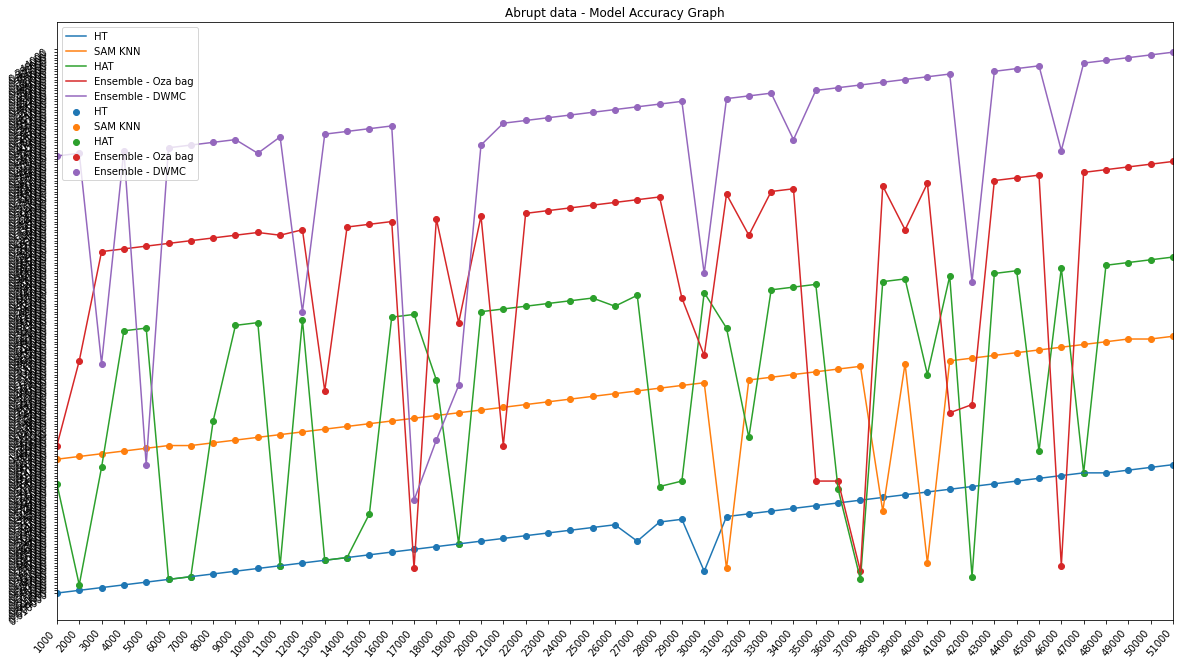

In [ ]:
# Abrupt

import matplotlib.pyplot as mpl
import numpy as np
from matplotlib import pyplot as plt
fig, ax = mpl.subplots(figsize=(20, 11))
x = np.arange(0, 50, 0.2)
#y = np.arange(0, 70, 1)
plt.title('Abrupt data - Model Accuracy Graph')
ax.scatter(list(np.array(graph_Abrupt_HT).T.tolist()[0]), list(np.array(graph_Abrupt_HT).T.tolist()[1]), label = "HT")
ax.plot(list(np.array(graph_Abrupt_HT).T.tolist()[0]), list(np.array(graph_Abrupt_HT).T.tolist()[1]), label = "HT")

ax.scatter(list(np.array(graph_Abrupt_KNN).T.tolist()[0]), list(np.array(graph_Abrupt_KNN).T.tolist()[1]), label = "SAM KNN")
ax.plot(list(np.array(graph_Abrupt_KNN).T.tolist()[0]), list(np.array(graph_Abrupt_KNN).T.tolist()[1]), label = "SAM KNN")

ax.scatter(list(np.array(graph_Abrupt_HAT).T.tolist()[0]), list(np.array(graph_Abrupt_HAT).T.tolist()[1]), label = "HAT")
ax.plot(list(np.array(graph_Abrupt_HAT).T.tolist()[0]), list(np.array(graph_Abrupt_HAT).T.tolist()[1]), label = "HAT")

ax.scatter(list(np.array(graph_Abrupt_Ozabag).T.tolist()[0]), list(np.array(graph_Abrupt_Ozabag).T.tolist()[1]), label = "Ensemble - Oza bag")
ax.plot(list(np.array(graph_Abrupt_Ozabag).T.tolist()[0]), list(np.array(graph_Abrupt_Ozabag).T.tolist()[1]), label = "Ensemble - Oza bag")

ax.scatter(list(np.array(graph_Abrupt_DWMC).T.tolist()[0]), list(np.array(graph_Abrupt_DWMC).T.tolist()[1]), label = "Ensemble - DWMC")
ax.plot(list(np.array(graph_Abrupt_DWMC).T.tolist()[0]), list(np.array(graph_Abrupt_DWMC).T.tolist()[1]), label = "Ensemble - DWMC")

for ax in fig.axes:
    mpl.sca(ax)
    plt.xticks(rotation=50, ha='right')
    plt.yticks(rotation=40, ha='right')
    

plt.legend(loc='best')
mpl.xlim([0, 50])
#mpl.ylim([0, 70])
mpl.show()

[['1000', '0.608000'], ['2000', '0.753000'], ['3000', '0.617000'], ['4000', '0.619000'], ['5000', '0.657000'], ['6000', '0.633000'], ['7000', '0.632000'], ['8000', '0.608000'], ['9000', '0.632000'], ['10000', '0.487000'], ['11000', '0.367000'], ['12000', '0.308000'], ['13000', '0.753000'], ['14000', '0.238000'], ['15000', '0.279000'], ['16000', '0.357000'], ['17000', '0.350000'], ['18000', '0.397000'], ['19000', '0.417000'], ['20000', '0.425000'], ['21000', '0.453000'], ['22000', '0.364000'], ['23000', '0.094000'], ['24000', '0.101000']]


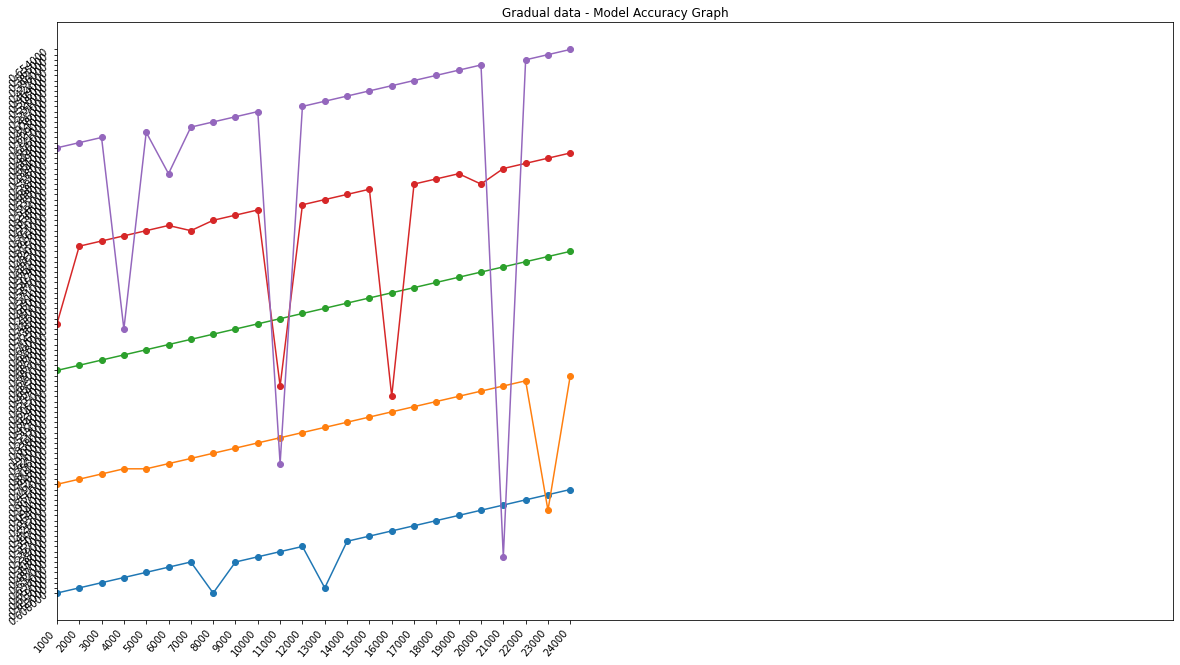

In [ ]:
# Gradual
import matplotlib.pyplot as mpl
import numpy as np
from matplotlib import pyplot as plt
fig, ax = mpl.subplots(figsize=(20, 11))
x = np.arange(0, 50, 0.2)
#y = np.arange(0, 70, 1)
print(graph_Grad_HT)
plt.title('Gradual data - Model Accuracy Graph')

ax.scatter(list(np.array(graph_Grad_HT).T.tolist()[0]), list(np.array(graph_Grad_HT).T.tolist()[1]), label = "HT")
ax.plot(list(np.array(graph_Grad_HT).T.tolist()[0]), list(np.array(graph_Grad_HT).T.tolist()[1]), label = "HT")

ax.scatter(list(np.array(graph_Grad_KNN).T.tolist()[0]), list(np.array(graph_Grad_KNN).T.tolist()[1]), label = "SAM KNN")
ax.plot(list(np.array(graph_Grad_KNN).T.tolist()[0]), list(np.array(graph_Grad_KNN).T.tolist()[1]), label = "SAM KNN")

ax.scatter(list(np.array(graph_Grad_HAT).T.tolist()[0]), list(np.array(graph_Grad_HAT).T.tolist()[1]), label = "HAT")
ax.plot(list(np.array(graph_Grad_HAT).T.tolist()[0]), list(np.array(graph_Grad_HAT).T.tolist()[1]), label = "HAT")

ax.scatter(list(np.array(graph_Grad_Ozabag).T.tolist()[0]), list(np.array(graph_Grad_Ozabag).T.tolist()[1]), label = "Ensemble - Oza bag")
ax.plot(list(np.array(graph_Grad_Ozabag).T.tolist()[0]), list(np.array(graph_Grad_Ozabag).T.tolist()[1]), label = "Ensemble - Oza bag")

ax.scatter(list(np.array(graph_Grad_DWMC).T.tolist()[0]), list(np.array(graph_Grad_DWMC).T.tolist()[1]), label = "Ensemble - DWMC")
ax.plot(list(np.array(graph_Grad_DWMC).T.tolist()[0]), list(np.array(graph_Grad_DWMC).T.tolist()[1]), label = "Ensemble - DWMC")

for ax in fig.axes:
    mpl.sca(ax)
    plt.xticks(rotation=50, ha='right')
    plt.yticks(rotation=40, ha='right')
 
mpl.xlim([0, 50])
#mpl.ylim([0, 70])
mpl.show()

In [ ]:
pip install passlib==1.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 507 kB 7.2 MB/s 


In [15]:
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTreeClassifier

state = 1 
data_stream  = DataStream(df_abrupt_X.to_numpy(), y = df_abrupt_y.to_numpy()) 
n_samples = 0
correct_cnt = 0
max_samples = len(df_abrupt_X)

ht = HoeffdingTreeClassifier()

while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = ht.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    ht = ht.partial_fit(X, y)
    n_samples += 1

print('{} samples for analysis.'.format(n_samples))
print('accuracy: {}'.format(correct_cnt / n_samples))

NameError: ignored

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from skmultiflow.drift_detection.adwin import ADWIN

data_stream  = DataStream(df_abrupt_X.to_numpy(), y = df_abrupt_y.to_numpy()) 

n_samples = 0
correct_cnt = 0
max_samples = len(df_abrupt_X)
accuracy = []
n_train = 1000
clf = HoeffdingTree()
X, y = data_stream.next_sample(batch_size=1000)
clf.partial_fit(X, y)
i = 0

for i  in range(len(df_abrupt_X)):
  while data_stream.has_more_samples():
    correct_cnt = 0
    X, y = data_stream.next_sample(batch_size=1000)     
    y_pred = ht.predict(X)
    for l in range(len(y_pred)):
       if y[l] == y_pred[l]:
        correct_cnt += 1    
    ht = ht.partial_fit(X, y)
    #n_samples += 1
    i += 1000   
    accuracy.append((correct_cnt/1000))
    #print('accuracy: {}'.format(correct_cnt / n_samples))
print(accuracy)

NameError: ignored

Mean acc within the window 0.5455


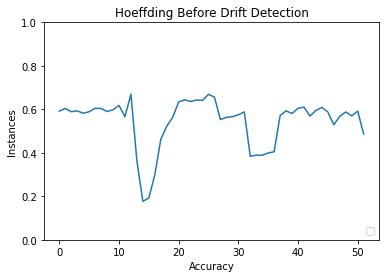

In [86]:
print("Mean acc within the window {}".format(np.mean(accuracy)))
plt.title("Hoeffding Before Drift Detection")
plt.ylabel("Instances")
plt.xlabel("Accuracy")
plt.plot(accuracy, "-" )
plt.legend(loc='lower right')
plt.ylim([0, 1])
plt.show()

In [42]:
 def eddm(stream):    
    detected_change = []
    detected_warning = []
    eddm = EDDM()
    data_stream = stream
    for i in range(len(stream)):
        eddm.add_element(data_stream[i])
        if eddm.detected_warning_zone():
            # train a model send the stream for training         
            detected_warning.append((data_stream[i]))
            print("Warning zone has been detected in data: {}"
                  " - of index: {}".format(data_stream[i], i))
        if eddm.detected_change():            
            detected_change.append(i)
            print("Change has been detected in data: {}"
                  " - of index: {}".format(data_stream[i], i))                       
    print("EDDM Detected changes: " + str(len(detected_change)))
    print("EDDM Detected warning zones: " + str(len(detected_warning)))
    print(detected_change)
    return detected_change

In [36]:
def make_stream(classifier , stream , outputFile):   
    print('inside')
    evaluator = EvaluatePrequential(n_wait = 1000,
                                show_plot=False,
                                batch_size=1000,
                                pretrain_size=1000,
                                max_samples=50000,
                                metrics = ['accuracy', 'running_time','model_size'],
                                output_file= outputFile)
                               
    evaluator.evaluate(stream=stream, model=classifier)
    stream = evaluator.stream.y
    return stream

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skmultiflow.drift_detection import EDDM
drifts_detected = []
filename= r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//DriftDetection_Abrupt.csv"
# warm up
X = df_abrupt_X
y = df_abrupt_y
 
streamDA  = DataStream(X.to_numpy(), y = y.to_numpy()) 
stream = make_stream(HoeffdingTreeClassifier() , streamDA,filename)

#Drift detection:
drifts_detected = eddm(stream)
pass

Streaming output truncated to the last 5000 lines.
Warning zone has been detected in data: [0] - of index: 44106
Warning zone has been detected in data: [2] - of index: 44107
Warning zone has been detected in data: [2] - of index: 44108
Warning zone has been detected in data: [0] - of index: 44109
Warning zone has been detected in data: [4] - of index: 44110
Warning zone has been detected in data: [4] - of index: 44111
Warning zone has been detected in data: [2] - of index: 44112
Warning zone has been detected in data: [4] - of index: 44113
Warning zone has been detected in data: [4] - of index: 44114
Warning zone has been detected in data: [4] - of index: 44115
Warning zone has been detected in data: [2] - of index: 44116
Warning zone has been detected in data: [0] - of index: 44117
Warning zone has been detected in data: [0] - of index: 44118
Warning zone has been detected in data: [3] - of index: 44119
Warning zone has been detected in data: [1] - of index: 44120
Warning zone has be

In [44]:
drifts_detected

[362,
 598,
 777,
 987,
 1161,
 1309,
 1464,
 1647,
 1805,
 2396,
 2569,
 2767,
 2920,
 3108,
 3272,
 3416,
 3546,
 4073,
 4284,
 4508,
 4690,
 4840,
 5062,
 5260,
 5394,
 5602,
 5793,
 5931,
 6117,
 6340,
 6483,
 6636,
 7048,
 7504,
 7724,
 7874,
 8040,
 8227,
 8366,
 8553,
 8678,
 8783,
 8925,
 9143,
 9344,
 9484,
 9687,
 9847,
 10194,
 10320,
 10443,
 10637,
 10772,
 10900,
 11047,
 11231,
 11399,
 11548,
 12046,
 12291,
 12424,
 14376,
 14502,
 14665,
 14794,
 14925,
 20340,
 20450,
 20624,
 20922,
 21081,
 21257,
 21505,
 21628,
 48174,
 48295,
 48491,
 48621,
 48761,
 48921,
 49034,
 50175,
 50294,
 50501,
 50765,
 50894,
 51154,
 51295,
 51556,
 51661,
 51838,
 51942]

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
filename= r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//DriftDetection_Gradual.csv"
# warm up
X = df_gradual_X
y = df_gradual_y
 
streamDA  = DataStream(X.to_numpy(), y = y.to_numpy()) 
stream = make_stream(HoeffdingTreeClassifier() , streamDA , filename)

#Drift detection:
drift_detecte_G = eddm(stream)
pass

inside
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [99%] [36.14s]
Processed samples: 25000
Mean performance:
M0 - Accuracy     : 0.5905
M0 - Training time (s)  : 20.76
M0 - Testing time  (s)  : 15.27
M0 - Total time    (s)  : 36.02
M0 - Size (kB)          : 214.6904
Warning zone has been detected in data: [1] - of index: 187
Warning zone has been detected in data: [1] - of index: 188
Warning zone has been detected in data: [0] - of index: 189
Warning zone has been detected in data: [1] - of index: 190
Warning zone has been detected in data: [1] - of index: 191
Warning zone has been detected in data: [0] - of index: 192
Warning zone has been detected in data: [0] - of index: 193
Warning zone has been detected in data: [0] - of index: 194
Warning zone has been detected in data: [1] - of index: 195
Warning zone has been detected in data: [0] - of index: 196
Warning zone has been detected in data: [0] - of index: 197
Wa

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
filename= r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//DriftDetection_Incremental.csv"
# warm up
X = df_incremental_X
y = df_incremental_y
 
streamDA  = DataStream(X.to_numpy(), y = y.to_numpy()) 
stream = make_stream(HoeffdingTreeClassifier() , streamDA,filename)

#Drift detection:
drift_detected_I = eddm(stream)
pass

inside
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [98%] [73.70s]
Processed samples: 50000
Mean performance:
M0 - Accuracy     : 0.5139
M0 - Training time (s)  : 42.42
M0 - Testing time  (s)  : 31.57
M0 - Total time    (s)  : 73.99
M0 - Size (kB)          : 326.4561
Change has been detected in data: [1] - of index: 174
Warning zone has been detected in data: [1] - of index: 426
Warning zone has been detected in data: [2] - of index: 427
Warning zone has been detected in data: [4] - of index: 428
Warning zone has been detected in data: [1] - of index: 429
Warning zone has been detected in data: [1] - of index: 430
Warning zone has been detected in data: [2] - of index: 431
Warning zone has been detected in data: [5] - of index: 432
Warning zone has been detected in data: [3] - of index: 433
Warning zone has been detected in data: [4] - of index: 434
Warning zone has been detected in data: [5] - of index: 435
Warning 

In [51]:
drift_detecte_G

[815,
 889,
 16458,
 16592,
 17145,
 17367,
 17546,
 18058,
 18287,
 18488,
 18683,
 19494,
 19675,
 19897]

In [52]:
drift_detected_I

[174,
 2318,
 2519,
 2685,
 2893,
 3098,
 3238,
 3481,
 3633,
 3838,
 4020,
 4225,
 5043,
 5244,
 5421,
 5609,
 5810]